In [ ]:
import numpy as np
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('all-states-history.csv')
df.head(5)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-02,AK,302.0,NaN,2,NaN,1286.0,1286.0,26.0,7,NaN,NaN,NaN,0,NaN,NaN,1634388.0,NaN,6.0,56428.0,NaN,89,0,NaN,NaN,NaN,NaN,68132.0,NaN,NaN,0,1704660.0,6629,NaN,NaN,NaN,NaN,NaN,0,1704660.0,6629
1,2021-03-02,AL,9991.0,7840.0,60,2151.0,45699.0,45699.0,631.0,51,2659.0,NaN,1908302.0,3161,NaN,NaN,NaN,1509.0,NaN,494421.0,387420.0,652,0,NaN,NaN,NaN,NaN,NaN,285130.0,NaN,0,2295722.0,3648,NaN,NaN,117904.0,NaN,2295722.0,3648,NaN,0
2,2021-03-02,AR,5254.0,4265.0,4,989.0,14795.0,14795.0,416.0,32,NaN,160.0,2448042.0,3673,NaN,NaN,2448042.0,1519.0,80.0,322949.0,254353.0,440,0,NaN,NaN,NaN,81207.0,NaN,313426.0,NaN,0,2702395.0,3898,NaN,NaN,NaN,467054.0,NaN,0,2702395.0,3898
3,2021-03-02,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,2140.0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-02,AZ,16060.0,14158.0,81,1902.0,57591.0,57591.0,1202.0,2,NaN,385.0,3007671.0,5459,NaN,NaN,NaN,NaN,203.0,818670.0,763416.0,849,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7701480.0,18991,439893.0,NaN,NaN,NaN,3771087.0,6223,7701480.0,18991


#Firstly, we calculate the effect of neighboring states on each other by using Linear Regression with positiveIncrease data

In [ ]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

Neighboring states

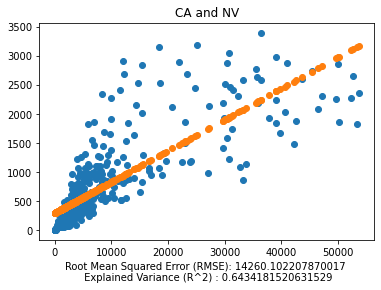

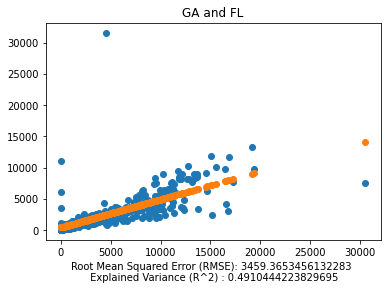

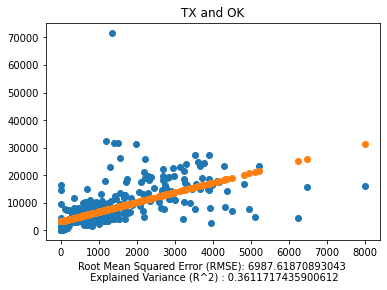

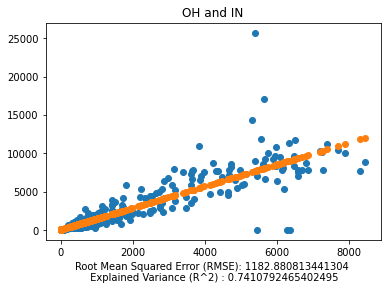

In [ ]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

t=0

neighbors = [('CA','NV'),('GA','FL'),('TX','OK'),('OH','IN')]
for s1,s2 in neighbors:
  dff = df[0:0].copy()
  for i in df['date'].unique().tolist():
    #For 2 certain states, select days such that both state has data in those days
    if ((df['state'] == s1) & (df['date'] == i)).any() == True and ((df['state'] == s2) & (df['date'] == i)).any() == True:
      df1 = df[((df['state'] == s1) & (df['date'] == i))].copy()
      df2 = df[((df['state'] == s2) & (df['date'] == i))].copy()
      dff = dff.append(df1)
      dff = dff.append(df2)
      dff = dff.sort_values(by=['state','date'])
  x = int(len(dff)/2)
  X_train = pd.DataFrame(dff[:x]['positiveIncrease'])
  y_train = pd.DataFrame(dff[x:]['positiveIncrease'])
  model.fit(X_train,y_train)
  y_pred = model.predict(X_train)

  mse = mean_sq_err(X_train,y_pred)
  f = plt.figure(t)
  plt.scatter(X_train,y_train) 
  plt.scatter(X_train,y_pred)
  plt.title(f'{s1} and {s2}')
  plt.xlabel(f'Root Mean Squared Error (RMSE): {np.sqrt(mse)} \n Explained Variance (R^2) : {model.score(X_train, y_train)}')
  f.show()
  t+=1

Non-neighboring states

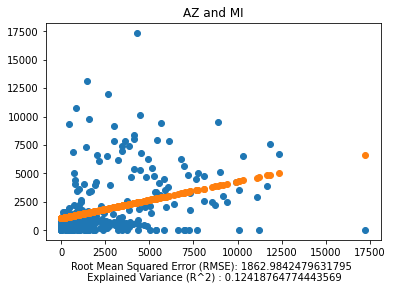

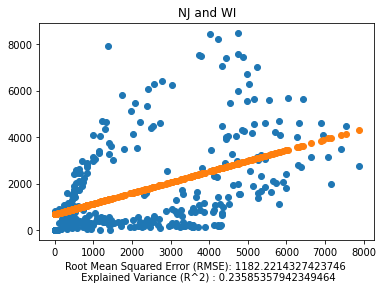

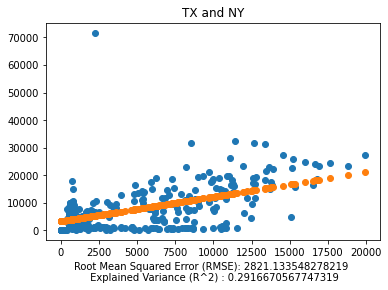

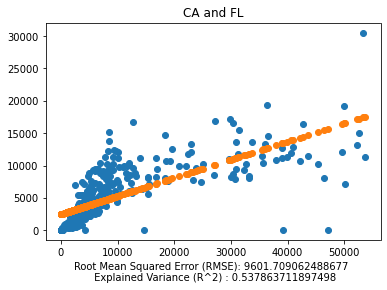

In [ ]:
t=0

neighbors = [('AZ','MI'),('NJ','WI'),('TX','NY'),('CA','FL')]
for s1,s2 in neighbors:
  dff = df[0:0].copy()
  for i in df['date'].unique().tolist():
    #For 2 certain states, select days such that both state has data in those days
    if ((df['state'] == s1) & (df['date'] == i)).any() == True and ((df['state'] == s2) & (df['date'] == i)).any() == True:
      df1 = df[((df['state'] == s1) & (df['date'] == i))].copy()
      df2 = df[((df['state'] == s2) & (df['date'] == i))].copy()
      dff = dff.append(df1)
      dff = dff.append(df2)
      dff = dff.sort_values(by=['state','date'])
  x = int(len(dff)/2)
  X_train = pd.DataFrame(dff[:x]['positiveIncrease'])
  y_train = pd.DataFrame(dff[x:]['positiveIncrease'])
  model.fit(X_train,y_train)
  y_pred = model.predict(X_train)

  mse = mean_sq_err(X_train,y_pred)
  f = plt.figure(t)
  plt.scatter(X_train,y_train) 
  plt.scatter(X_train,y_pred)
  plt.title(f'{s1} and {s2}')
  plt.xlabel(f'Root Mean Squared Error (RMSE): {np.sqrt(mse)} \n Explained Variance (R^2) : {model.score(X_train, y_train)}')
  f.show()
  t+=1

As we can see, the mse of neigboring states is lower than that of non-neighboring states and the explained variances is higher. Then we can conclude that neighboring states are affecting each other in the number of of cases increase per day

## Question: why are some neighboring states more similar (have higher R^2 values) than others?